## mean price of Duke

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Duke.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Sort the data by 'PublishDate'
df = df.sort_values(by='PublishDate')

# Convert 'PublishDate' to datetime format and set it as the index
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df.set_index('PublishDate', inplace=True)

# Add year and cyclic features for day of the year
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear
df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

# Aggregate data to handle multiple observations per time step
df_grouped = df.groupby(df.index).agg({
    'Y2': ['mean', 'std', 'min', 'max', 'count'],  # Target variable statistics
    'Y1': ['mean', 'std', 'min', 'max', 'count'],  # Feature variable statistics
    'Z1': ['mean', 'std', 'min', 'max', 'count'],  # Additional feature statistics
    'Z2': ['mean', 'std', 'min', 'max', 'count'],
    'Z3': ['mean', 'std', 'min', 'max', 'count'],
    'Z4': ['mean', 'std', 'min', 'max', 'count']
})

# Flatten MultiIndex columns for clarity
df_grouped.columns = ['_'.join(col) for col in df_grouped.columns]

# Reset the index to make 'PublishDate' a column
df_grouped.reset_index(inplace=True)

# Add the 'year', 'day_sin', and 'day_cos' features to the aggregated dataset
#df_grouped['year'] = df_grouped['PublishDate'].dt.year
#df_grouped['day_sin'] = np.sin(2 * np.pi * df_grouped['PublishDate'].dt.dayofyear / 365)
#df_grouped['day_cos'] = np.cos(2 * np.pi * df_grouped['PublishDate'].dt.dayofyear / 365)

# Handle missing values by filling NaNs with 0 (e.g., std of a single value = 0)
df_grouped.fillna(0, inplace=True)

# Display the first few rows of the aggregated dataset
print(df_grouped.head())


  PublishDate  Y2_mean  Y2_std  Y2_min  Y2_max  Y2_count  Y1_mean  Y1_std  \
0  2014-01-10     5.99     0.0    5.99    5.99         1     5.49     0.0   
1  2014-01-11     5.99     0.0    5.99    5.99         1     5.49     0.0   
2  2014-01-12     5.99     0.0    5.99    5.99         1     5.49     0.0   
3  2014-01-13     5.99     0.0    5.99    5.99         1     5.49     0.0   
4  2014-01-14     5.99     0.0    5.99    5.99         1     5.49     0.0   

   Y1_min  Y1_max  ...  Z3_mean  Z3_std  Z3_min  Z3_max  Z3_count  Z4_mean  \
0    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   
1    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   
2    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   
3    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   
4    5.49    5.49  ...      0.0     0.0       0       0         1    100.0   

   Z4_std  Z4_min  Z4_max  Z4_count  
0     0.0     100     100     

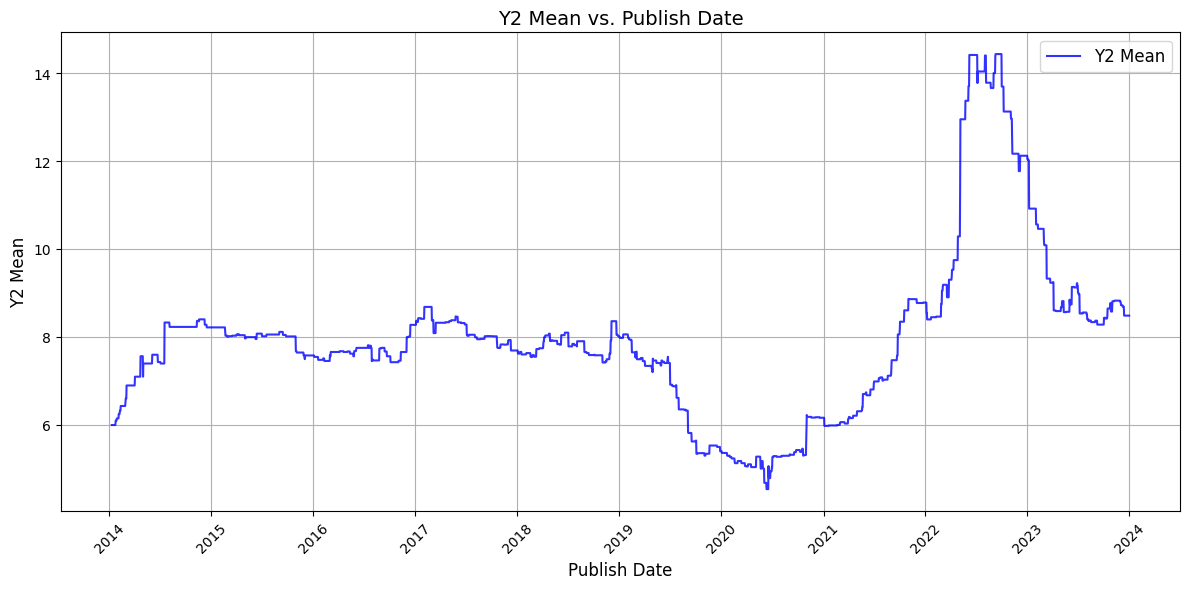

In [3]:
import matplotlib.pyplot as plt

# Extract relevant columns
publish_dates = df_grouped['PublishDate']  # The publish dates
y2_mean = df_grouped['Y2_mean']  # The mean of Y2

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(publish_dates, y2_mean, label='Y2 Mean', color='blue', linestyle='-', marker='', alpha=0.8)

# Add titles and labels
plt.title('Y2 Mean vs. Publish Date', fontsize=14)
plt.xlabel('Publish Date', fontsize=12)
plt.ylabel('Y2 Mean', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
# Extract relevant date components
df_grouped['No'] = df_grouped.index + 1  # Add a row number (1-based index)
df_grouped['year'] = pd.to_datetime(df_grouped['PublishDate']).dt.year
df_grouped['month'] = pd.to_datetime(df_grouped['PublishDate']).dt.month
df_grouped['day'] = pd.to_datetime(df_grouped['PublishDate']).dt.day

df_grouped.drop(columns=['PublishDate'], inplace=True)

# Display the first few rows of the aggregated dataset
print(df_grouped.head())


   Y2_mean  Y2_std  Y2_min  Y2_max  Y2_count  Y1_mean  Y1_std  Y1_min  Y1_max  \
0     5.99     0.0    5.99    5.99         1     5.49     0.0    5.49    5.49   
1     5.99     0.0    5.99    5.99         1     5.49     0.0    5.49    5.49   
2     5.99     0.0    5.99    5.99         1     5.49     0.0    5.49    5.49   
3     5.99     0.0    5.99    5.99         1     5.49     0.0    5.49    5.49   
4     5.99     0.0    5.99    5.99         1     5.49     0.0    5.49    5.49   

   Y1_count  ...  Z3_count  Z4_mean  Z4_std  Z4_min  Z4_max  Z4_count  No  \
0         1  ...         1    100.0     0.0     100     100         1   1   
1         1  ...         1    100.0     0.0     100     100         1   2   
2         1  ...         1    100.0     0.0     100     100         1   3   
3         1  ...         1    100.0     0.0     100     100         1   4   
4         1  ...         1    100.0     0.0     100     100         1   5   

   year  month  day  
0  2014      1   10  
1  201

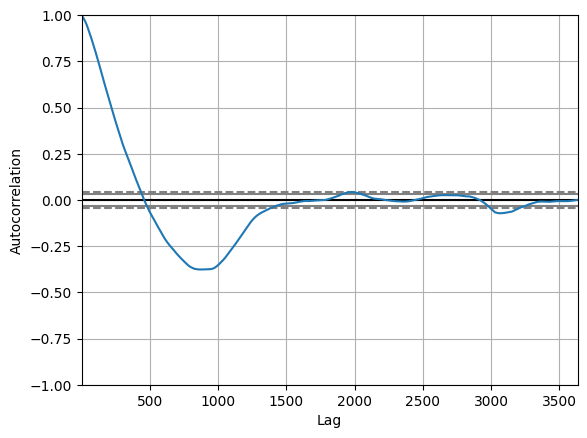

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Check autocorrelation to see if step 365 is highly predictable from past data
autocorrelation_plot(df_grouped['Y2_mean'])
plt.show()


## Performance metrics

In [6]:
## directional_accuracy

import numpy as np

def directional_accuracy_include_no_change(y_true, y_pred):
    """
    Computes the Directional Accuracy (DA) metric, including "no change" cases.

    Parameters:
    y_true (array-like): Actual values of the time series (can be 1D or 2D).
    y_pred (array-like): Predicted values of the time series (can be 1D or 2D).

    Returns:
    float: Directional Accuracy (proportion of correctly predicted directions)
    """
    # Flatten inputs if 2D
    y_true = np.ravel(y_true)  # Ensures a 1D array
    y_pred = np.ravel(y_pred)  # Ensures a 1D array

    if len(y_true) < 2 or len(y_pred) < 2:
        raise ValueError("Both y_true and y_pred must have at least two elements")

    # Compute the sign of changes
    actual_direction = np.sign(np.diff(y_true))  # Actual direction (1 = up, -1 = down, 0 = no change)
    predicted_direction = np.sign(np.diff(y_pred))  # Predicted direction (1, -1, or 0)

    # Compare predicted vs actual directions (including "no change" cases)
    correct_directions = actual_direction == predicted_direction

    # Compute directional accuracy
    da = np.mean(correct_directions) if len(correct_directions) > 0 else np.nan
    
    return da

In [7]:
## Mean Absolute Percentage Change Error (MAPCE)

import numpy as np

def evaluate_change_performance(y_true, y_pred):
    """
    Evaluates model performance based on the amount of change.

    Parameters:
    y_true (array-like): Actual values of the time series.
    y_pred (array-like): Predicted values of the time series.

    Returns:
    dict: Dictionary with MAPCE, correlation, and other metrics.
    """
    # Flatten inputs if 2D
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    
    if len(y_true) < 2 or len(y_pred) < 2:
        raise ValueError("Both y_true and y_pred must have at least two elements")

    # Compute changes (delta)
    delta_actual = np.diff(y_true)
    delta_predicted = np.diff(y_pred)
    
    # Remove zero-change cases from actual to avoid division errors
    valid_indices = delta_actual != 0
    delta_actual = delta_actual[valid_indices]
    delta_predicted = delta_predicted[valid_indices]

    # MAPCE (Mean Absolute Percentage Change Error)
    mapce = np.mean(np.abs((delta_actual - delta_predicted) / delta_actual)) * 100

    return mapce

### Example usage
y_actual = np.array([[6.99], [7.09], [8.59], [6.55], [7.89]])
y_predicted = np.array([[7.00], [7.10], [8.60], [6.50], [7.80]])

y_actual = np.array([100, 105, 105, 105, 105, 100]) 
y_predicted = np.array([100, 100, 106, 104, 100, 100]) 

da_score = directional_accuracy_include_no_change(y_actual, y_predicted)
print(f"Directional Accuracy (with no change cases): {da_score:.2%}")

mapce_score = evaluate_change_performance(y_actual, y_predicted)
print(f"Mean Absolute Percentage Change Error: {mapce_score:.2f}")

In [8]:
# Evaluation of Time-to-Next-Change

import numpy as np

def evaluate_time_to_next_change(y_true, y_pred):
    """
    Evaluates the model's ability to predict the time-to-next-change (m).

    Parameters:
    y_true (array-like): Actual values of the time series.
    y_pred (array-like): Predicted values of the time series.

    Returns:
    dict: Dictionary with MAE, RMSE, and timing accuracy metrics.
    """
    # Flatten inputs if 2D
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    
    def calculate_time_to_next_change(series):
        """
        Calculate the time-to-next-change (m) for each time step in a series.
        """
        time_to_next_change = []
        for i in range(len(series)):
            m = 1
            while i + m < len(series) and series[i] == series[i + m]:
                m += 1
            if i + m == len(series):  # No further changes
                m = np.inf
            time_to_next_change.append(m)
        return np.array(time_to_next_change)

    # Compute time-to-next-change for actual and predicted series
    m_actual = calculate_time_to_next_change(y_true)
    m_predicted = calculate_time_to_next_change(y_pred)
    # print(m_actual)
    # print(m_predicted)

    # Remove inf values (time steps with no further changes)
    valid_indices = np.isfinite(m_actual) & np.isfinite(m_predicted)
    m_actual = m_actual[valid_indices]
    m_predicted = m_predicted[valid_indices]
    # print(m_actual)
    # print(m_predicted)

    # Count of exact matches
    exact_match_count = np.sum(m_actual == m_predicted)
    total_valid = len(m_actual)
    exact_match_accuracy = exact_match_count / total_valid if total_valid > 0 else 0.0

    return {
        "Exact Match Count": exact_match_count,
        "Exact Match Accuracy": exact_match_accuracy
    }


### Example usage
y_actual = np.array([100, 100, 105, 105, 105, 100])
y_predicted = np.array([100, 100, 106, 104, 100, 100])

metrics = evaluate_time_to_next_change(y_actual, y_predicted)
print("Time-to-Next-Change Performance Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

In [9]:
# Evaluation of directional accuracy with the correct Time-to-Next-Change

import numpy as np

def evaluate_directional_accuracy_after_correct_m(y_true, y_pred):
    """
    Evaluates the model's directional accuracy after correctly predicting time-to-next-change (m).

    Parameters:
    y_true (array-like): Actual values of the time series.
    y_pred (array-like): Predicted values of the time series.

    Returns:
    dict: Dictionary with metrics including directional accuracy after correct m.
    """
    # Flatten inputs if 2D
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)

    def calculate_time_to_next_change(series):
        """
        Calculate the time-to-next-change (m) for each time step in a series.
        """
        time_to_next_change = []
        for i in range(len(series)):
            m = 1
            while i + m < len(series) and series[i] == series[i + m]:
                m += 1
            if i + m == len(series):  # No further changes
                m = np.inf
            time_to_next_change.append(m)
        return np.array(time_to_next_change)

    # Compute time-to-next-change for actual and predicted series
    m_actual = calculate_time_to_next_change(y_true)
    m_predicted = calculate_time_to_next_change(y_pred)

    # Identify indices where m is correctly predicted
    correct_m_indices = np.where((m_actual == m_predicted) & (np.isfinite(m_actual)))[0]

    # Compute directional accuracy for correctly predicted m
    correct_direction_count = 0
    total_correct_m = len(correct_m_indices)

    for i in correct_m_indices:
        # Ensure we can calculate the direction (avoid index errors)
        if i + int(m_actual[i]) < len(y_true):
            actual_direction = np.sign(y_true[i + int(m_actual[i])] - y_true[i])
            predicted_direction = np.sign(y_pred[i + int(m_predicted[i])] - y_pred[i])
            if actual_direction == predicted_direction:
                correct_direction_count += 1

    # Directional Accuracy (DA) after correct m
    directional_accuracy = correct_direction_count / total_correct_m if total_correct_m > 0 else np.nan

    return {
        "Total Correct m": total_correct_m,
        "Directional Accuracy After Correct m": directional_accuracy
    }


### Example usage
y_actual = np.array([100, 100, 105, 105, 105, 100])
y_predicted = np.array([100, 100, 99, 104, 100, 100])

metrics = evaluate_directional_accuracy_after_correct_m(y_actual, y_predicted)
print("Performance Metrics After Correct m:")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

In [10]:
# Evaluation of Mean absolute percentage change error  with the correct Time-to-Next-Change

import numpy as np

def evaluate_mapce_after_correct_m(y_true, y_pred):
    """
    Evaluates the model's Mean Absolute Percentage Change Error (MAPCE) 
    after correctly predicting time-to-next-change (m).

    Parameters:
    y_true (array-like): Actual values of the time series.
    y_pred (array-like): Predicted values of the time series.

    Returns:
    dict: Dictionary with metrics including MAPCE after correct m.
    """
    # Flatten inputs if 2D
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)

    def calculate_time_to_next_change(series):
        """
        Calculate the time-to-next-change (m) for each time step in a series.
        """
        time_to_next_change = []
        for i in range(len(series)):
            m = 1
            while i + m < len(series) and series[i] == series[i + m]:
                m += 1
            if i + m == len(series):  # No further changes
                m = np.inf
            time_to_next_change.append(m)
        return np.array(time_to_next_change)

    # Compute time-to-next-change for actual and predicted series
    m_actual = calculate_time_to_next_change(y_true)
    m_predicted = calculate_time_to_next_change(y_pred)

    # Identify indices where m is correctly predicted
    correct_m_indices = np.where((m_actual == m_predicted) & (np.isfinite(m_actual)))[0]

    # Compute MAPCE for correctly predicted m
    percentage_errors = []
    for i in correct_m_indices:
        # Ensure valid indexing
        if i + int(m_actual[i]) < len(y_true):
            actual_change = y_true[i + int(m_actual[i])] - y_true[i]
            predicted_change = y_pred[i + int(m_predicted[i])] - y_pred[i]
            
            # Avoid division by zero for percentage error
            if actual_change != 0:
                percentage_error = np.abs((actual_change - predicted_change) / actual_change) * 100
                percentage_errors.append(percentage_error)

    # Compute MAPCE
    mapce = np.mean(percentage_errors) if len(percentage_errors) > 0 else np.nan

    return {
        "Total Correct m": len(correct_m_indices),
        "MAPCE After Correct m (%)": mapce
    }

## predict step 2

In [11]:
# prepare data for lstm
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df_grouped
values = dataset.values
# integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
cols_to_drop = list(range(35, len(reframed.columns)))
reframed.drop(reframed.columns[cols_to_drop], axis=1, inplace=True)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.147415        0.0     0.2871   0.027907        0.0   0.128793   
2   0.147415        0.0     0.2871   0.027907        0.0   0.128793   
3   0.147415        0.0     0.2871   0.027907        0.0   0.128793   
4   0.147415        0.0     0.2871   0.027907        0.0   0.128793   
5   0.147415        0.0     0.2871   0.027907        0.0   0.128793   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var26(t-1)  var27(t-1)  \
1        0.0   0.275362        0.0         0.0  ...         1.0         0.0   
2        0.0   0.275362        0.0         0.0  ...         1.0         0.0   
3        0.0   0.275362        0.0         0.0  ...         1.0         0.0   
4        0.0   0.275362        0.0         0.0  ...         1.0         0.0   
5        0.0   0.275362        0.0         0.0  ...         1.0         0.0   

   var28(t-1)  var29(t-1)  var30(t-1)  var31(t-1)  var32(t-1)  var33(t-1)  \
1         1.0        

In [12]:
# split into train and test sets
values = reframed.values
n_train = 365*8
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# print(test)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2920, 1, 34) (2920,) (712, 1, 34) (712,)


Epoch 1/50


c:\Users\ji.702\AppData\Local\anaconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 - 2s - 43ms/step - loss: 0.1316 - val_loss: 0.4796
Epoch 2/50
41/41 - 0s - 2ms/step - loss: 0.0919 - val_loss: 0.4427
Epoch 3/50
41/41 - 0s - 3ms/step - loss: 0.0637 - val_loss: 0.3928
Epoch 4/50
41/41 - 0s - 3ms/step - loss: 0.0464 - val_loss: 0.3155
Epoch 5/50
41/41 - 0s - 2ms/step - loss: 0.0653 - val_loss: 0.2826
Epoch 6/50
41/41 - 0s - 2ms/step - loss: 0.0400 - val_loss: 0.2584
Epoch 7/50
41/41 - 0s - 3ms/step - loss: 0.0373 - val_loss: 0.2235
Epoch 8/50
41/41 - 0s - 3ms/step - loss: 0.0315 - val_loss: 0.1912
Epoch 9/50
41/41 - 0s - 2ms/step - loss: 0.0319 - val_loss: 0.1515
Epoch 10/50
41/41 - 0s - 3ms/step - loss: 0.0358 - val_loss: 0.1022
Epoch 11/50
41/41 - 0s - 3ms/step - loss: 0.0364 - val_loss: 0.0961
Epoch 12/50
41/41 - 0s - 2ms/step - loss: 0.0399 - val_loss: 0.1616
Epoch 13/50
41/41 - 0s - 2ms/step - loss: 0.0401 - val_loss: 0.1500
Epoch 14/50
41/41 - 0s - 2ms/step - loss: 0.0329 - val_loss: 0.0983
Epoch 15/50
41/41 - 0s - 2ms/step - loss: 0.0290 - val_loss: 0.1126

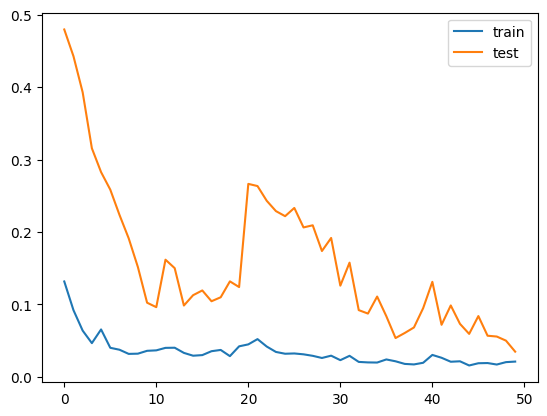

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from matplotlib import pyplot
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [14]:
from math import sqrt
from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# calculate r2_score
r2 = r2_score(inv_y, inv_yhat)
print('Test r2_score: %.3f' % r2 )

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test RMSE: 0.472
Test r2_score: 0.955


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
mse = mean_squared_error(inv_y, inv_yhat)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate MAPE
mape = np.mean(np.abs((inv_y - inv_yhat) / inv_y)) 
print(f"Mean Absolute Percentage Error: {mape}")

r2 = r2_score(inv_y, inv_yhat)
print(f"R-squared Error: {r2}")

Root Mean Squared Error: 0.471803218126297
Mean Absolute Percentage Error: 0.029143473133444786
R-squared Error: 0.954695178468185


In [16]:
da_score = directional_accuracy_include_no_change(inv_y, inv_yhat)
print(f"Directional Accuracy (with no change cases): {da_score:.2%}")

mapce_score = evaluate_change_performance(inv_y, inv_yhat)
print(f"Mean Absolute Percentage Change Error: {mapce_score:.2f}")

metrics = evaluate_time_to_next_change(inv_y, inv_yhat)
print("Time-to-Next-Change Performance Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

metrics = evaluate_directional_accuracy_after_correct_m(inv_y, inv_yhat)
print("Performance Metrics After Correct m:")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

metrics = evaluate_mapce_after_correct_m(inv_y, inv_yhat)
print("Performance Metrics After Correct m:")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

Directional Accuracy (with no change cases): 6.47%
Mean Absolute Percentage Change Error: 381.16
Time-to-Next-Change Performance Metrics:
Exact Match Count: 80.00
Exact Match Accuracy: 0.12
Performance Metrics After Correct m:
Total Correct m: 80.00
Directional Accuracy After Correct m: 0.57
Performance Metrics After Correct m:
Total Correct m: 80.00
MAPCE After Correct m (%): 381.16


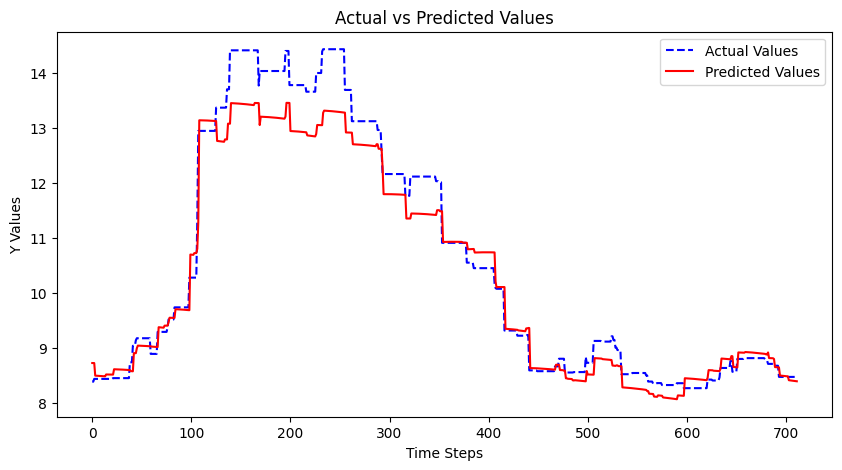

In [17]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(inv_y, label="Actual Values", color='blue', linestyle='dashed')
plt.plot(inv_yhat, label="Predicted Values", color='red')
plt.xlabel("Time Steps")
plt.ylabel("Y Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

## Train On Multiple Lag Timesteps Example
## predict step 4

(3630, 136)
(2920, 102) 2920 (2920,)
(2920, 3, 34) (2920,) (710, 3, 34) (710,)
Epoch 1/50


c:\Users\ji.702\AppData\Local\anaconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 - 2s - 45ms/step - loss: 0.1291 - val_loss: 0.2765
Epoch 2/50
41/41 - 0s - 3ms/step - loss: 0.0747 - val_loss: 0.3266
Epoch 3/50
41/41 - 0s - 3ms/step - loss: 0.0827 - val_loss: 0.3327
Epoch 4/50
41/41 - 0s - 3ms/step - loss: 0.0611 - val_loss: 0.2133
Epoch 5/50
41/41 - 0s - 3ms/step - loss: 0.0517 - val_loss: 0.2210
Epoch 6/50
41/41 - 0s - 3ms/step - loss: 0.0459 - val_loss: 0.1795
Epoch 7/50
41/41 - 0s - 3ms/step - loss: 0.0465 - val_loss: 0.2238
Epoch 8/50
41/41 - 0s - 3ms/step - loss: 0.0454 - val_loss: 0.1389
Epoch 9/50
41/41 - 0s - 3ms/step - loss: 0.0377 - val_loss: 0.1412
Epoch 10/50
41/41 - 0s - 3ms/step - loss: 0.0310 - val_loss: 0.1115
Epoch 11/50
41/41 - 0s - 3ms/step - loss: 0.0320 - val_loss: 0.0857
Epoch 12/50
41/41 - 0s - 4ms/step - loss: 0.0381 - val_loss: 0.1140
Epoch 13/50
41/41 - 0s - 3ms/step - loss: 0.0342 - val_loss: 0.1479
Epoch 14/50
41/41 - 0s - 3ms/step - loss: 0.0293 - val_loss: 0.1082
Epoch 15/50
41/41 - 0s - 3ms/step - loss: 0.0287 - val_loss: 0.1230

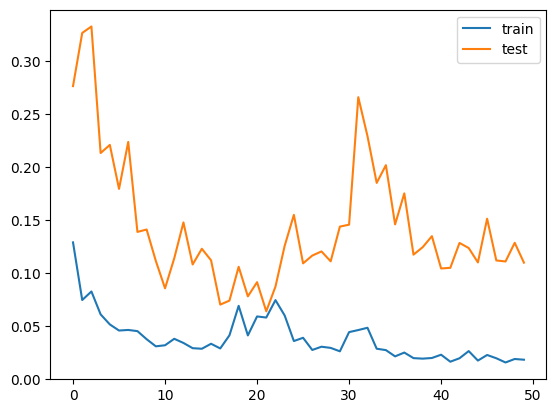

In [15]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df_grouped
values = dataset.values

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag days
n_days = 3
n_features = 34
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)
 
# split into train and test sets
values = reframed.values
n_train_days = 365 * 8
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [16]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -33:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -33:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# calculate r2_score
r2 = r2_score(inv_y, inv_yhat)
print('Test r2_score: %.3f' % r2 )

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Test RMSE: 1.393
Test r2_score: 0.605


In [17]:
da_score = directional_accuracy_include_no_change(inv_y, inv_yhat)
print(f"Directional Accuracy (with no change cases): {da_score:.2%}")

mapce_score = evaluate_change_performance(inv_y, inv_yhat)
print(f"Mean Absolute Percentage Change Error: {mapce_score:.2f}")

metrics = evaluate_time_to_next_change(inv_y, inv_yhat)
print("Time-to-Next-Change Performance Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

metrics = evaluate_directional_accuracy_after_correct_m(inv_y, inv_yhat)
print("Performance Metrics After Correct m:")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

metrics = evaluate_mapce_after_correct_m(inv_y, inv_yhat)
print("Performance Metrics After Correct m:")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

Directional Accuracy (with no change cases): 7.05%
Mean Absolute Percentage Change Error: 224.32
Time-to-Next-Change Performance Metrics:
Exact Match Count: 79.00
Exact Match Accuracy: 0.11
Performance Metrics After Correct m:
Total Correct m: 79.00
Directional Accuracy After Correct m: 0.63
Performance Metrics After Correct m:
Total Correct m: 79.00
MAPCE After Correct m (%): 224.32


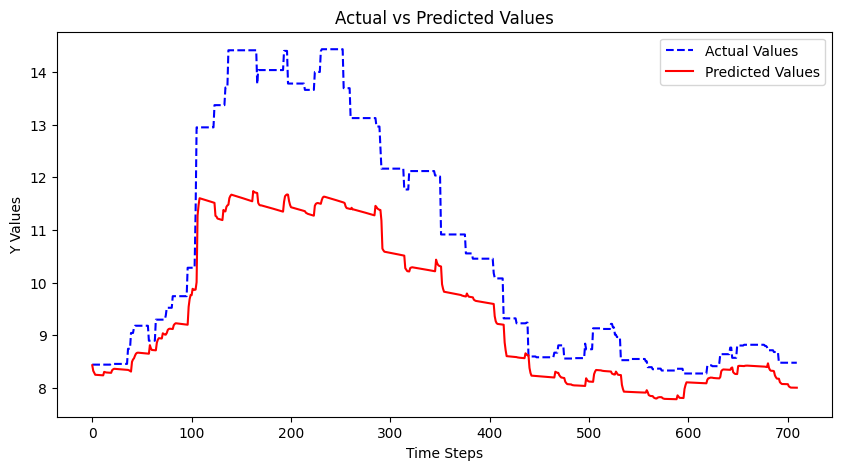

In [18]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(inv_y, label="Actual Values", color='blue', linestyle='dashed')
plt.plot(inv_yhat, label="Predicted Values", color='red')
plt.xlabel("Time Steps")
plt.ylabel("Y Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
